<a href="https://colab.research.google.com/github/Bhanu-spe/cnn_learning/blob/main/Understanding_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import cv2

In [11]:
image_path='/content/halfb-halfw.png'

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
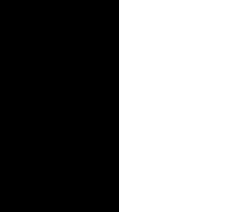

In [12]:
org_img=cv2.imread(image_path)
org_img

In [13]:
# so this is an rgb image as it has 3 channels


array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)
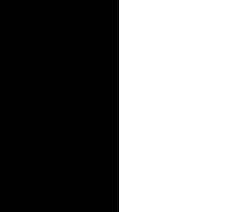

In [14]:
gs_image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
gs_image

In [15]:
# now it is a grayscale image --> only 1 channel

In [16]:
sobel_vertical_kernel=np.array([[-1,0,1],
                                [-2,0,2],
                                [-1,0,1]])

In [17]:
sobel_vertical_kernel # the filter to detect vertical edges

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [18]:
rows,cols=gs_image.shape

In [19]:
k=sobel_vertical_kernel.shape[0]

In [20]:
output_matrix=np.zeros((rows-k+1,cols-k+1)) # initialising the output matrix with zeros as we know the output matrix shape
output_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
gs_image.shape

(212, 238)

In [24]:
for i in range (1,rows-1):
  for j in range(1,cols-1):
    region=gs_image[i-1:i+2,j-1:j+2] #receptive field
    output_matrix[i-1,j-1]=np.sum(region*sobel_vertical_kernel) # element wise multipy hoga and then their sum


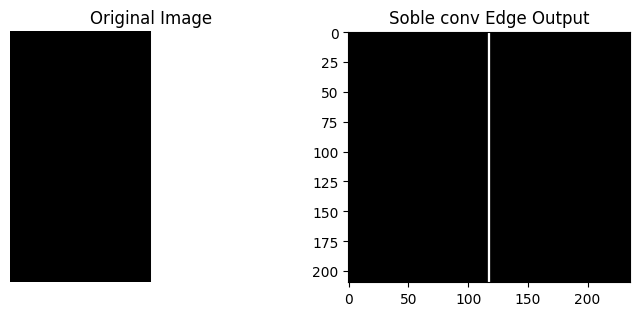

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize= (8,5))

#Original image
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(gs_image,cmap='gray')
plt.axis('off')


#FeatureMap
plt.subplot(1,2,2)
plt.title("Soble conv Edge Output")
plt.imshow(output_matrix,cmap='gray')
plt.axis()
plt.show()

In [28]:
#now we can see that we got the vertical edge

Using cv2


In [29]:
sobel_out=cv2.filter2D(gs_image,-1,sobel_vertical_kernel) #-1 so that it will give the output image with same depth as it represents ddepth --> destination depth

In [31]:
sobel_out.shape

(212, 238)

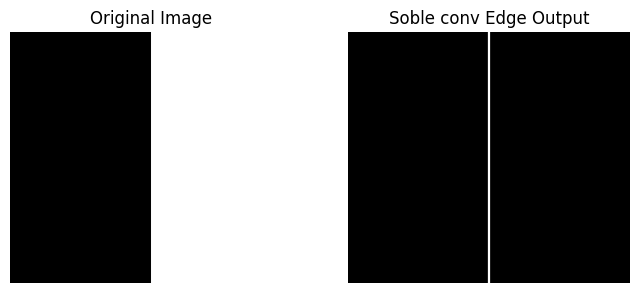

In [33]:


plt.figure(figsize= (8,5))

#Original image
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(gs_image,cmap='gray')
plt.axis('off')


#FeatureMap
plt.subplot(1,2,2)
plt.title("Soble conv Edge Output")

plt.imshow(sobel_out,cmap='gray')
plt.axis('off')
plt.show()

Horizontal kernel


In [34]:
#Now let's try with horizontal sobel detector

In [35]:
horizontal_sobel=np.array([[1,2,1],
                           [0,0,0],
                           [-1,-2,-1]])

In [37]:
sobel_out=cv2.filter2D(gs_image,-1,horizontal_sobel)
sobel_out.shape

(212, 238)

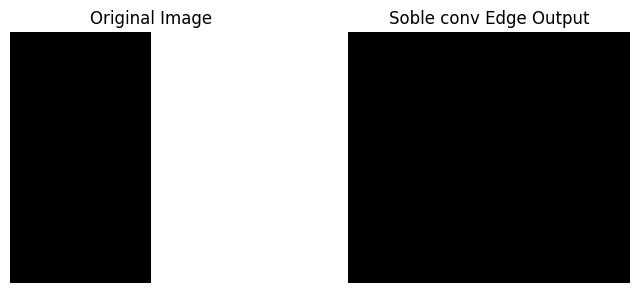

In [38]:


plt.figure(figsize= (8,5))

#Original image
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(gs_image,cmap='gray')
plt.axis('off')


#FeatureMap
plt.subplot(1,2,2)
plt.title("Soble conv Edge Output")

plt.imshow(sobel_out,cmap='gray')
plt.axis('off')
plt.show()

In [39]:
#Now we can see that there is no edge detected

In [40]:
#Now let's try with blur filter

In [41]:
blur_kernel=np.array([[1/9,1/9,1/9],
                      [1/9,1/9,1/9],
                      [1/9,1/9,1/9]])

array([[ 76,  63,  58, ...,  92,  90,  87],
       [ 79,  65,  58, ..., 116, 114, 111],
       [ 79,  64,  55, ..., 149, 147, 143],
       ...,
       [180, 180, 181, ..., 191, 191, 191],
       [181, 181, 181, ..., 190, 190, 189],
       [181, 181, 181, ..., 190, 190, 189]], dtype=uint8)
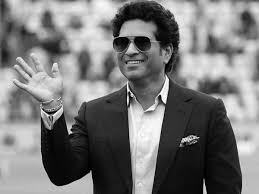

In [46]:
imge=cv2.imread('/content/sachin.jpg',cv2.IMREAD_GRAYSCALE)
imge

In [47]:
sobel_out=cv2.filter2D(imge,-1,blur_kernel)
sobel_out.shape

(194, 259)

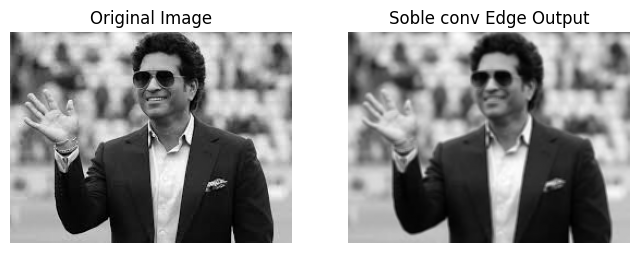

In [49]:


plt.figure(figsize= (8,5))

#Original image
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(imge,cmap='gray')
plt.axis('off')


#FeatureMap
plt.subplot(1,2,2)
plt.title("Soble conv Edge Output")

plt.imshow(sobel_out,cmap='gray')
plt.axis('off')
plt.show()

In [50]:
# Now we can see that our output image is blurred